<a href="https://colab.research.google.com/github/shayari21/Udacity--Secure-AI/blob/master/Building_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks in Pytorch

Here we use the MNIST datasets available in the *torchvision* package. So MNIST consists of various handwritten visual images and we later on create a neural network which recognises those images.

We import MNIST package as follows:


In [1]:
!pip install torchvision


In [0]:
import numpy as np
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt



In [4]:
# Normalising data
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),
                                                                           (0.5,0.5,0.5)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True, transform= transform)
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8557964.13it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136951.54it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2249199.38it/s]                            
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 51319.80it/s]            


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


We now check what we have downloaded by iterating it using *iter(trainloader)*

In [11]:
# Normalising data
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),
                                                                           (0.5,)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True, transform= transform)
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
dataiter= iter(trainloader)
images, labels=dataiter.next()
print(type(images))
print(images.shape) #(batch size, color channel, pixel, pixel)
print(labels.shape)



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


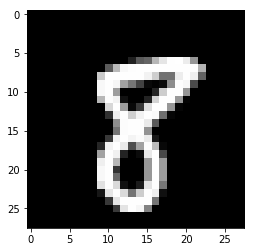

In [12]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

Now we flatten the image to 28X28=784 (converting a 2d to 1d), thus the new images is of size (64,784). Thus NN will have 784 input units , 256 hidden units and 10 output units.

In [15]:
# Flattening images

def activation(x):
  return 1/(1+torch.exp(-x))

inputs= images.view(images.shape[0],-1) ## -1 to create the 1d

w1=torch.randn(784,256)
b1= torch.randn(256)

w2= torch.randn(256,10)
b2= torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)

out= torch.mm(h,w2)+b2
print(out.shape)
print(out)

torch.Size([64, 10])
tensor([[ 4.8200e+00,  1.4900e-01, -1.3551e+01, -1.4280e+01, -2.3578e+00,
          1.1601e+01, -6.3677e+00, -1.3442e+01,  1.1009e+01, -9.9163e+00],
        [-9.5477e+00, -2.9735e+00, -4.9223e+00, -4.1817e-01, -2.7794e+00,
          5.5116e+00,  6.8852e+00, -1.0623e+01, -4.1012e+00,  7.9233e-01],
        [-1.1984e+01, -6.8400e+00, -3.0592e+00, -4.9366e+00,  8.0824e+00,
          4.8075e+00, -1.0905e+01, -1.2419e+01,  1.5224e+00, -6.4632e+00],
        [ 9.8460e-01,  2.7041e+00, -8.0425e+00, -8.1945e+00,  4.5778e+00,
          3.2954e-01, -5.2833e+00, -8.1730e+00, -1.0603e+01, -4.3338e+00],
        [-3.4743e+00, -1.8851e+01, -1.1994e+01, -3.1514e+00,  7.3965e+00,
          6.5063e+00,  2.9687e+00, -1.0131e+01,  7.8512e+00, -1.3525e+00],
        [-1.3739e+01, -5.4184e+00, -1.2191e+01, -1.3108e+01, -6.1567e+00,
         -3.8881e+00,  3.5809e-01, -3.3160e+00, -2.0662e+00, -4.5381e+00],
        [-6.6441e+00, -1.1316e+00, -3.7408e+00, -1.3711e+01,  8.6573e+00,
          1

So when we try to find the probability distribution of the above tensors, we find that it is kind of uniform because it has not learned anything yet. Thus to calculate the probability distribution we calculate the **Softmax** function. Thus it squeezes the probability values between 0 and 1 and thsu the total sum of all probabilities sums up to 1.



In [16]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities= softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


Building NN using **nn** module of Pytorch

In [0]:
from torch import nn

class Network(nn.Module):
  def __init__(self):   ## Calling nn Module 
    super().__init__()
    
    # Inputs to linear transformation
    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
    
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
def forward(self,x):
  x=self.hidden(x)
  x=self.sigmoid(x)
  x=self.output(x)
  x=self.softmax(x)
  
  return x

In [22]:
model = Network()
model
    

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

Using functional  module, makes code shorter and clean.

In [24]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden=nn.Linear(784,256)
    self.output= nn.Linear(256,10)
    
  def forward(self,x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x),dim=1)
    
    return x

model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

**ACTIVATION FUNCTIONS**

1. Sigmoid - 
       f(x)=1/(1+exp(-x))
2. TanH(hyberbolic Tangent) - 
       tanh(x)=   
        (2/(1+exp(-2x))-1
3.ReLU(rectified Linear Unit)(For hidden layers preferred)
      f(x)= x  for x>=0

In [28]:
## ASSIGNMENT

import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    
  def forward(self,x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.softmax(self.output(x),dim=1)
    
    return x
  
model=Network()
model
  

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)